# Análisis Exploratorio de Datos
## Top 100 Canciones de Spotify de 2025

**Autores:** Gia Mariana Calle Higuita - José Santiago Molano Perdomo - Juan José Restrepo Higuita

**Fecha:** 30 de enero de 2026

En este documento vamos a realizar paso por paso el Análisis Exploratorio de Datos (EDA) de un dataset acerca de las 100 canciones más populares del 2025 de acuerdo con Spotify.

Los pasos que vamos a seguir para esto son:

1. Pregunta que queremos responder
2. Exploración general del dataset
3. Exploración y descripción estadística
4. Visualizar los datos
5. Análisis bivariado y multivariado
6. Extraer conclusiones

# 1. Comprensión del negocio

Para comprender el negocio, podemos ponernos en la posición de una disquera que quiere saber qué tipo de artista y de canciones pueden estar en tendencia en este 2026. Para eso, podemos basarnos en las tendencias del 2025.

A través de este dataset, hay varias preguntas que podemos responder al hacer este análisis. Algunas de estas podrían ser:
* ¿Quién fue el artista más escuchado del 2025? ¿Fue un hombre o una mujer?
* ¿Hay una correlación entre la popularidad de la canción y su duración?
* ¿Qué géneros fueron los más populares?

# 2. Compresión de los datos

Para familiarizarnos con el dataset, podemos explorarlo, ver su tamaño, sus variables y qué valores pueden tener.

In [1]:
# Para esto, importamos los datos y algunas librerías útiles
import pandas as pd               # Nos sirve para la lectura y manipulación de datos
import matplotlib.pyplot as plt   # Nos sirve para la visualización de datos
import seaborn as sns             # Nos sirve para la visualización de datos

df = pd.read_csv('datasets/top-100_spotify-songs_2025.csv')

df.info()   # Describe las variable que están en el dataset, cuántos registros hay y de qué tipo son los valores que pueden tomar esos registros

<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rank                      100 non-null    int64  
 1   Song_Title                100 non-null    str    
 2   Artist                    100 non-null    str    
 3   Genre                     100 non-null    str    
 4   Release_Date              100 non-null    str    
 5   Spotify_Streams_Millions  100 non-null    float64
 6   Popularity_Score          100 non-null    int64  
 7   Duration_Seconds          100 non-null    int64  
 8   Explicit                  100 non-null    str    
dtypes: float64(1), int64(3), str(5)
memory usage: 7.2 KB


In [2]:
# Vemos los datos para darnos una mejor idea
display(df)

,Rank,Song_Title,Artist,Genre,Release_Date,Spotify_Streams_Millions,Popularity_Score,Duration_Seconds,Explicit
0,1,Song 1,Taylor Swift,Latin,2023-11-12,1686.11,79,282,No
1,2,Song 2,Travis Scott,Pop,2024-10-20,654.74,87,144,Yes
2,3,Song 3,Ed Sheeran,Afrobeats,2023-04-23,1739.75,99,200,Yes
3,4,Song 4,Doja Cat,Afrobeats,2023-05-21,924.50,66,282,Yes
4,5,Song 5,Imagine Dragons,Electronic,2023-03-29,833.80,72,293,Yes
...,...,...,...,...,...,...,...,...,...
95,96,Song 96,Ed Sheeran,Electronic,2023-08-27,984.96,80,120,No
96,97,Song 97,Post Malone,Indie,2024-06-28,768.59,61,140,Yes
97,98,Song 98,Dua Lipa,Hip-Hop,2023-06-14,1409.08,98,258,No
98,99,Song 99,Travis Scott,Rock,2024-01-09,976.79,83,265,No


## Variables

| Variable                 | Tipo      | Categoría   | Descripción                                            |
| :----------------------- | :-------- | :---------- | :----------------------------------------------------- |
| Rank                     | int64     | Cuantitativa| Posición de la canción en el top 100.                  |
| Song_Title               | object    | Cualitativa | Título de la canción (En este caso, solo están nombradas del 1 al 100)                                  |
| Artist                   | object    | Cualitativa | Nombre del artista o grupo.                            |
| Genre                    | object    | Cualitativa | Género musical de la canción.                          |
| Release_Date             | object    | Cualitativa | Fecha de lanzamiento de la canción.                    |
| Spotify_Streams_Millions | float64   | Cuantitativa| Número de reproducciones en Spotify (en millones).     |
| Popularity_Score         | int64     | Cuantitativa| Puntuación de popularidad de la canción (0-100).       |
| Duration_Seconds         | int64     | Cuantitativa| Duración de la canción en segundos.                    |
| Explicit                 | object    | Cualitativa | Indica si la canción contiene contenido explícito.     |

Como pudimos ver anteriormente, tenemos variables cualitativas, como el género o el nombre del artista; y cuantitativas, como los millones de streams en Spotify o el puntaje de popularidad. Este último es un puntaje de 0 a 100.

# 3. Exploración y descripción estadística

Para responder a las preguntas planteadas anteriormente, debemos usar estadística descriptiva y visualizaciones que nos lleven a un entendimiento más profundo de los datos.

In [3]:
# Podemos iniciar con descripciones simples como el promedio, el conteo total, los valores máximos, mínimos y los cuartiles.
df.describe()

,Rank,Spotify_Streams_Millions,Popularity_Score,Duration_Seconds
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,1014.224700,80.440000,201.480000
std,29.011492,462.757956,12.517721,53.173336
min,1.000000,172.800000,60.000000,120.000000
25%,25.750000,663.020000,70.000000,149.000000
50%,50.500000,1005.475000,80.000000,202.000000
75%,75.250000,1383.252500,93.000000,245.750000
max,100.000000,1791.490000,100.000000,296.000000


# 4. Visualización de datos

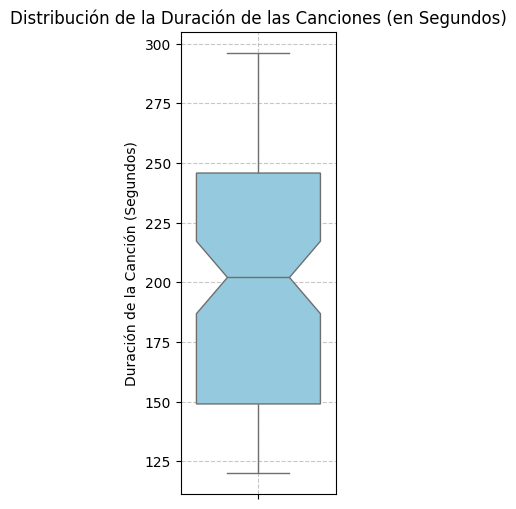

In [4]:
# Utilizamos un gráfico para ver esta información con mayor claridad
plt.figure(figsize=(2, 6))
sns.boxplot(y=df['Duration_Seconds'], color='skyblue', notch=True)
plt.title('Distribución de la Duración de las Canciones (en Segundos)')
plt.ylabel('Duración de la Canción (Segundos)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

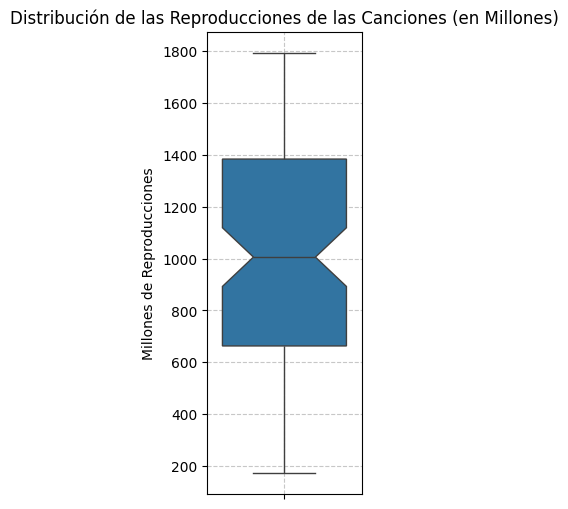

In [5]:
plt.figure(figsize=(2, 6))
sns.boxplot(y=df['Spotify_Streams_Millions'], notch=True)
plt.title('Distribución de las Reproducciones de las Canciones (en Millones)')
plt.ylabel('Millones de Reproducciones')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 5. Análisis bivariado y multivariado
## ¿Quién fue el artista más escuchado?

In [6]:
# Para saber quién fue el artista más escuchado, debemos agrupar los registros por nombre y por número de reproducciones en Spotify.

artista_mas_escuchado = df.groupby('Artist')['Spotify_Streams_Millions'].sum().sort_values(ascending=False)
artista_mas_escuchado.head()

Artist
Doja Cat         10024.72
Bad Bunny         8023.58
Taylor Swift      7505.83
SZA               6674.63
Billie Eilish     6393.53
Name: Spotify_Streams_Millions, dtype: float64

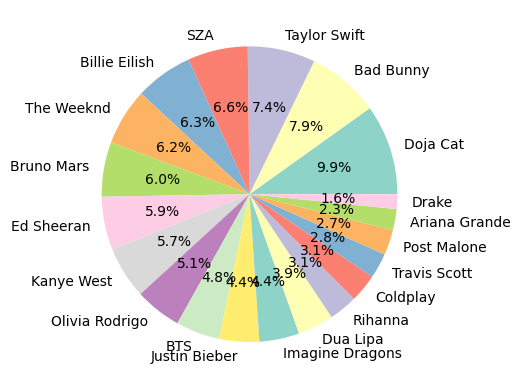

In [7]:
plt.pie(artista_mas_escuchado, labels=artista_mas_escuchado.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.show()

Como podemos ver en la tabla y en el gráfico anterior, Doja Cat fue la artista más escuchada del 2025, contando con casi el 10% de la suma del total de las reproducciones de los 100 artistas más escuchados de ese año. Podemos decir además que 4 de los 5 artistas más escuchados del año 2025 son mujeres.

## ¿Hay correlación entre la duración de una canción y su popularidad?

In [8]:
# Para ver esta correlación, podemos calcular el índice de correlación entre su duración en segundos y su puntaje de popularidad

correlacion = df['Duration_Seconds'].corr(df['Popularity_Score'])
print("Índice de correlación: "+str(correlacion))

Índice de correlación: -0.030413707277248257


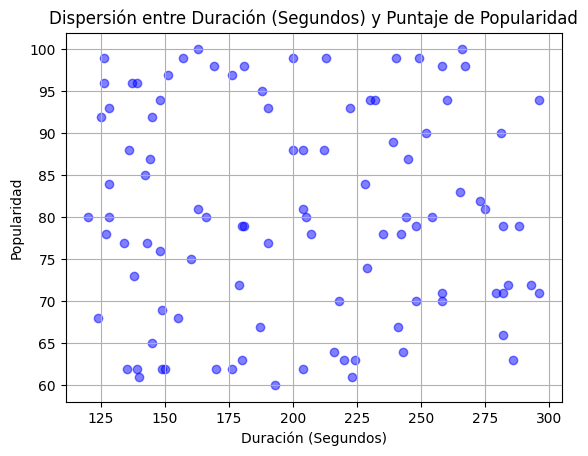

In [9]:
# También podemos crear una gráfica de dispersión entre su duración en segundos y su puntaje de popularidad

plt.scatter(df['Duration_Seconds'], df['Popularity_Score'], color='blue', alpha=0.5)

plt.title("Dispersión entre Duración (Segundos) y Puntaje de Popularidad")
plt.xlabel("Duración (Segundos)")
plt.ylabel("Popularidad")

# Mostrar la gráfica
plt.grid(True)
plt.show()

Al basarnos tanto en este índice de correlación tan cercano a 0 como en esta gráfica de dispersión sin tendencia clara, podemos afirmar que no existe una correlación entre la duración de la canción y su popularidad.

## ¿Qué géneros fueron los más populares?

In [10]:
# Para saber qué generos fueron los más populares, podemos agrupar los registros por género musical y popularidad.

generos_mas_populares = df.groupby('Genre')['Popularity_Score'].mean().sort_values(ascending=False)
display(generos_mas_populares)

Genre
Afrobeats     85.769231
Hip-Hop       83.500000
Pop           80.615385
Indie         79.066667
K-Pop         79.000000
Rock          79.000000
R&B           78.428571
Electronic    78.285714
Latin         75.000000
Name: Popularity_Score, dtype: float64

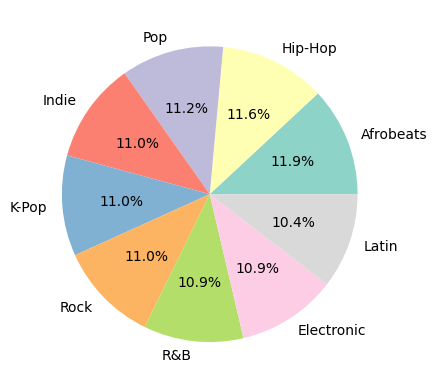

In [11]:
plt.pie(generos_mas_populares, labels=generos_mas_populares.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.show()

In [12]:
desviacion = generos_mas_populares.std()
print("Desviación estándar entre la popularidad en promedio de los géneros: "+str(desviacion))

Desviación estándar entre la popularidad en promedio de los géneros: 3.1423347146510605


En este caso, podemos ver que las diferencias no son tan marcadas. Sacando el promedio de popularidad de cada uno de estos géneros, podemos decir que el Afrobeats es el más popular en promedio, seguido de cerca por el Hip-Hop y el Pop.

Esto también se puede ver en la desviación estandar, que es de apenas 3 puntos del puntaje de satisfacción.

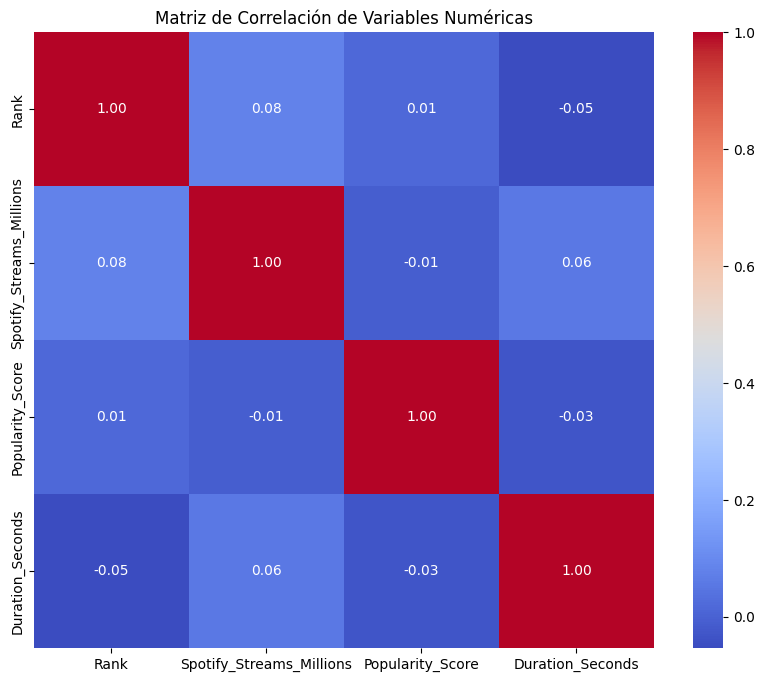

In [13]:
# Adicionalmente podemos hacer un análisis a través de un heatmap que nos muestra qué otras variables podrían tener relación entre ellas

# Seleccionamos solo columnas numéricas para calcular la matriz de correlación
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f") # fmt=".2f" para mostrar 2 decimales en las anotaciones
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

A través de este Heatmap podemos visualizar sin lugar a dudas que ninguna de las variables numéricas están relacionadas entre sí.

# 6. Conclusiones

A través de este análisis, podemos extraer las siguientes conclusiones:

* 4 de los 5 artistas más escuchados de 2025 son mujeres.
* El género musical con mayor puntaje de popularidad es el Afrobeats.
* El género musical no es un indicador con el suficiente peso para decantarse por uno o por otro.
* No existe una correlación entre la duración de una canción y su popularidad.
* La duración de la canción, su puntaje de popularidad y su número de reproducciones no están relacionados entre sí.